<a href="https://colab.research.google.com/github/francoquintanilla0/Modulo2-ML/blob/main/Modelo_RegLin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Documentos IA'
!ls

/content/gdrive/MyDrive/Colab Notebooks/Documentos IA
 advertising.csv   Marriage_Divorce_DB.csv   titanic	      wine.names
 iris.data	   PlayDataset.csv	     Valhalla23.csv
 iris.names	  'Real State'		     wine.data


In [43]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [44]:
# Importamos nuestro data frame
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Documentos IA/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [45]:
# Contamos si hay datos NaNs
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [46]:
# Vemos el tamaño de los datos para separar por train y test
df.shape

(200, 4)

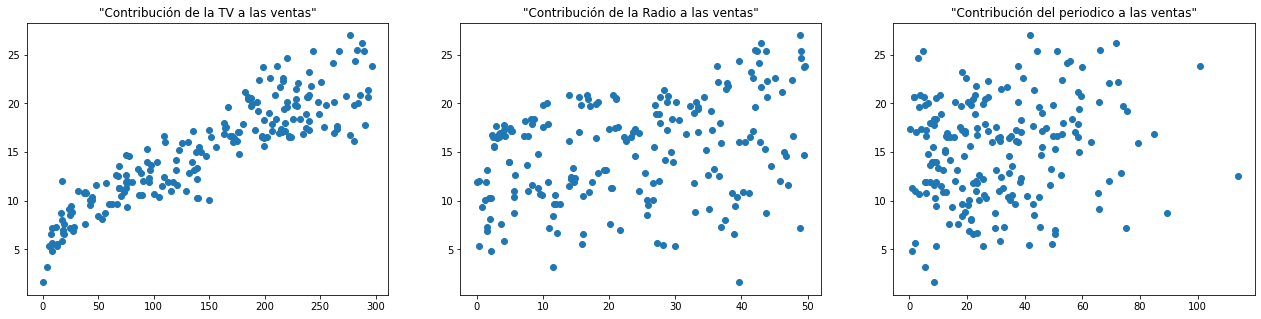

In [47]:
# Visualizamos nuestras variables para poder hacer un mejor analisis dobre la regresión
fig, ax = plt.subplots(1, 3, figsize=(22,5))

ax[0].scatter(df['TV'], df['Sales'])
ax[0].set_title('"Contribución de la TV a las ventas"')

ax[1].scatter(df['Radio'], df['Sales'])
ax[1].set_title('"Contribución de la Radio a las ventas"')

ax[2].scatter(df['Newspaper'], df['Sales'])
ax[2].set_title('"Contribución del periodico a las ventas"')

plt.show()

In [48]:
# Vemos que la mejor opción sería irnos por la TV, por lo que
# dividimos nuestro data frame xs y nuestro goal (y) en est y train
dfx = df['TV']
dfy = df['Sales']

x_train, x_test, y_train, y_test = \
train_test_split(dfx, dfy, test_size=0.25, random_state=1800)

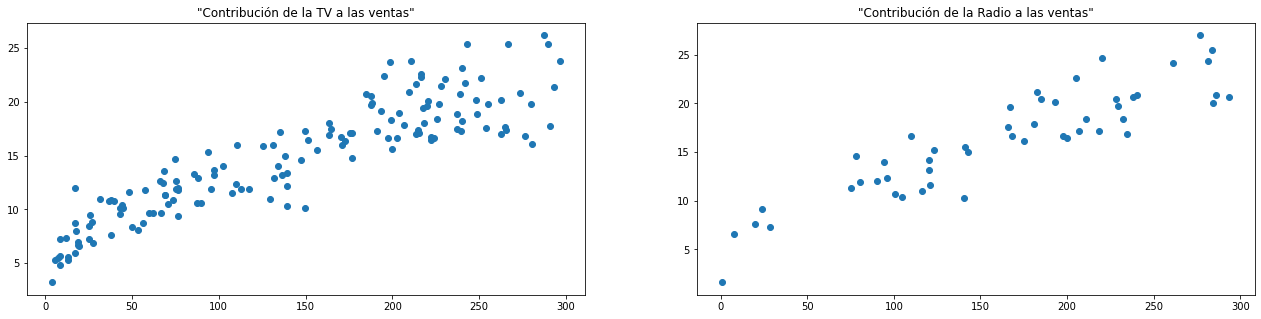

In [49]:
# Vemos como quedarón las gráficas
fig, ax = plt.subplots(1, 2, figsize=(22,5))

ax[0].scatter(x_train, y_train)
ax[0].set_title('"Contribución de la TV a las ventas"')

ax[1].scatter(x_test, y_test)
ax[1].set_title('"Contribución de la Radio a las ventas"')

plt.show()

In [50]:
# Hipótesis (entrenamiento y error)
h = lambda x, theta: theta[0] + theta[1]*x
j_i = lambda x, y, theta: (h(x, theta) - y)**2 

# Parametros
alpha = 0.001
n = 100000
theta = [7, 0.05]

# Entrenamiento
for i in range(n):
  delta = []
  deltax = []

  for x_i, y_i in zip(x_train, y_train):
    delta.append(h(x_i, theta) - y_i)
    deltax.append((h(x_i, theta) - y_i)*x_i)

  # Thetas
  theta[0] = theta[0] - alpha/n*sum(delta)
  theta[1] = theta[1] - alpha/n*sum(deltax)

print(theta)

[7.005456507872502, 0.05440861754403683]


In [51]:
# Training
delta_train = []
for x_i, y_i in zip(x_train, y_train):
  delta_train.append(j_i(x_i, y_i, theta))  
 
J_train = 1/(2*n)*sum(delta_train)

# Validación
delta_test = []
for x_i, y_i in zip(x_test, y_test):
  delta_test.append(j_i(x_i, y_i, theta))  
 
J_test = 1/(2*n)*sum(delta_test)

print("Error en el train:", J_train)
print("Error en el test:", J_test)
print("Valores de las thetas", theta)

Error en el train: 0.0038008150009347878
Error en el test: 0.0014406509787007276
Valores de las thetas [7.005456507872502, 0.05440861754403683]


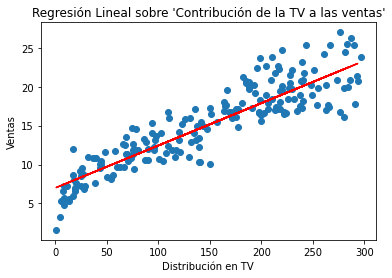

In [52]:
plt.scatter(df['TV'], df['Sales'])
plt.plot(x_test, theta[0] + theta[1]*x_test, 'r')
plt.title("Regresión Lineal sobre 'Contribución de la TV a las ventas'")
plt.xlabel("Distribución en TV")
plt.ylabel("Ventas")
plt.show()

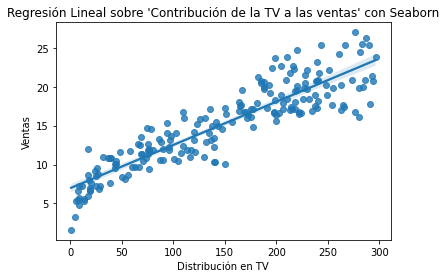

In [53]:
# Podemos comparar con seaborn a ver que tan parecidos estamos.
sns.regplot(x='TV', y='Sales', data=df)
plt.title("Regresión Lineal sobre 'Contribución de la TV a las ventas' con Seaborn")
plt.xlabel("Distribución en TV")
plt.ylabel("Ventas")
plt.show()

In [54]:
# Hacemos algunas predicciones
y_pred = theta[0] + theta[1]*x_test

# Calculamos el coeficiente de determinación
c_mat = np.corrcoef(y_test, y_pred)
CoD = c_mat[0,1]
CoD = CoD**2
print("El coeficiente de determinación es de:", CoD)

# Calculamos el MSE (Mean Squared Error)
MSE = np.square(np.subtract(y_test, y_pred)).mean()
print("El error cuadratico medio es de:", MSE)

El coeficiente de determinación es de: 0.8114838687030127
El error cuadratico medio es de: 5.7626039148029085


Como podemos ver, vamos por buen camino de la regresión lineal de primer orden con un coeficiente de determinación de 0.811, el cual se podría mejorar y ajustar con un modelo de regresión no lineal. 

Si tratamos de meter las variables de "Radio" y "Newspaper" el modelo empieza a tener errores demasiado grandes y el modelo ya no se ajusta correctamente, ya que estas variables meten demasiado ruido a nuestro probelma original.

Agregamos el ***Análisis sobre el desempeño del modelo***


**Sesgo**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


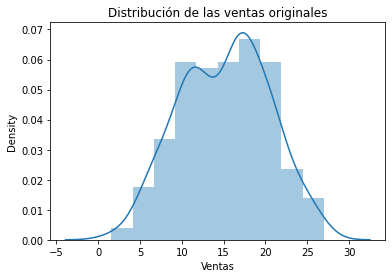

In [55]:
# Originalmente nuestros datos de las ventas se comportan de la siguiente manera
sns.distplot(df["Sales"])
plt.title("Distribución de las ventas originales")
plt.xlabel("Ventas")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


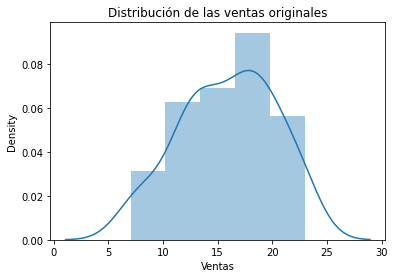

In [56]:
sns.distplot(y_pred)
plt.title("Distribución de las ventas originales")
plt.xlabel("Ventas")
plt.show()

Podemos observar que en base a nuetra muestra de test en y, y nuestras predicciones hechas con nuestro modelo, ambas se comportan de manera similar, aunque si tomamos el comportamiento del y_test como normal aunque con un cierto "bump", entonces nuestra predicción se ve que tiene una curtosis más platicúrtica, además de que el y_test se ve que está un poco sesgada a la izquierda, y nuestra predicción se ve que igual está sesgada, auqneu no en la misma magnitiud.

**Varainza**

In [57]:
from statistics import variance

print("La varianza de y_test es " + str(variance(df["Sales"])))
print("La varianza de y_pred es " + str(variance(y_pred)))

La varianza de y_test es 27.919517336683416
La varianza de y_pred es 18.776934877788143


En el caso de la varianza, vemos que hay más varianza de los datos originales que en nuestra predicción, lo que quiere decir que tenemos menos dispersión de nuestros datos con respecto de la media, que los datos del dataset.

**Underfitting o Overfitting**

Para saber si nuestro modelo es bueno o malo, vamos a usar el learning curve, para saber como va a prendiendo nuestro modelo a lo largo de su desempeño.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [62]:
model = LinearRegression()

x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

model.fit(x_train, y_train)

LinearRegression()

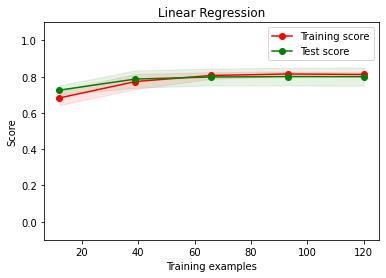

In [68]:
train_sizes, train_scores, test_scores = learning_curve(lg, x_train, y_train, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
    
plt.figure()
plt.title("Linear Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
    
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")
    
plt.ylim(-.1,1.1)
plt.show()

En base a esto, vemos que nuestro modelo es bueno para la regresión y aprende con su entrenamiento y se comporta bien a la hora del test.